## Proyek Sistem Rekomendasi Musik Spotify
- Nama  : Hilman Fauzan
- Email : hilmanfauzan462@gmail.com

## Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import sys
import matplotlib.pyplot as plt
import seaborn as sns

Dalam submission ini, library yang dipakai yaitu:
- pandas dan numpy sebagai fondasi untuk manipulasi data tabular dan komputasi numerik.
- sklearn, TfidfVectorizer digunakan untuk mengubah data tekstual seperti nama lagu dan genre menjadi format numerik.
- StandardScaler digunakan untuk menskalakan fitur numerik audio agar seragam.
- cosine_similarity digunakan untuk menghitung kemiripan antar lagu berdasarkan fitur-fitur tersebut. Hal ini merupakan sebuah inti dari sistem Content-based.
- scipy.sparse.hstack digunakan untuk menggabungkan representasi fitur tekstual yang efisien (sparse) dengan fitur numerik.
- matplotlib.pyplot dan seaborn adalah alat visualisasi data yang penting untuk mengeksplorasi dan memahami karakteristik dataset.
- sys menyediakan fungsi interaksi sistem dasar seperti menangani keluar dari program saat error.

## Data Understanding

In [ ]:
# Data Load
file_path_high_pop = "high_popularity_spotify_data.csv"
file_path_low_pop = "low_popularity_spotify_data.csv"

df_high_pop = pd.read_csv(file_path_high_pop)
df_low_pop = pd.read_csv(file_path_low_pop)

if list(df_high_pop.columns) != list(df_low_pop.columns):
    print("\nNama kolom diantara kedua file tidak sama percis.")


Nama kolom diantara kedua file tidak sama percis.


Dataset diambil dari 2 file yaitu high_popularity_spotify_data.csv dan low_popularity_spotify_data.csv. Kode paling bawah digunakan untuk mengecek kesamaan kolom diantara 2 file, dan kedua file tersebut memiliki nama kolom yang tidak percis atau urutannya berbeda.

**Pengecekan Dataset High Popularity**

In [ ]:
print("5 Data awal dari high_popularity")
df_high_pop.head()

5 Data awal dari high_popularity


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


Kode diatas menampilkan 5 baris teratas dari data set high_popularity_spotify_data.csv

In [ ]:
print("Tipe Data dari high_popularity")
df_high_pop.info()

Tipe Data dari high_popularity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 n

Dataset memiliki 29 kolom atau fitur yang bertipe float64 sebanyak 9 kolom, integer 5 kolom, dan object sebanyak 15 kolom.

In [ ]:
# Statistik
print("Deskripsi Statitik Data dari high_popularity")
df_high_pop.describe()

Deskripsi Statitik Data dari high_popularity


,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


Kode di atas menampilkan informasi deskripsi statistik dari dataset high_popularity_spotify_data.csv yang terdiri dari jumlah baris, rata-rata, standar deviasi, jumlah minimal, Quartal 1, Quartal 2, Quartal 3, dan jumlah maksimal dari setiap kolom.

In [ ]:
print("Jumlah missing values per kolom pada Data High Popularity:")
print(df_high_pop.isnull().sum())

Jumlah missing values per kolom pada Data High Popularity:
energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            1
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64


Dalam pengecekan missing value dari dataset high_popularity_spotify_data.csv, ditemukan bahwa hanya terdapat 1 missing value pada kolom track_album_name saja, selain itu aman.

In [ ]:
print("\nJumlah baris duplikat pada Data High Popularity:")
num_duplicates = df_high_pop.duplicated().sum()
print(num_duplicates)


Jumlah baris duplikat pada Data High Popularity:
0


Dalam pengecekan data duplikat dari dataset high_popularity_spotify_data.csv, tidak ada data atau baris yang duplikat.

**Pengecekan Dataset Low Popularity**

In [ ]:
print("5 Data awal dari low_popularity")
df_low_pop.head()

5 Data awal dari low_popularity


,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


Menampilkan 5 data teratas dari dataset low_popularity_spotify_data.csv

In [ ]:
print("Tipe Data dari low_popularity")
df_low_pop.info()

Tipe Data dari low_popularity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 no

Dataset memiliki 29 kolom atau fitur

In [ ]:
print("Deskripsi Statistik Data dari low_popularity")
df_low_pop.describe()

Deskripsi Statistik Data dari low_popularity


,time_signature,track_popularity,speechiness,danceability,duration_ms,energy,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
count,3144.000000,3145.000000,3144.000000,3144.000000,3.144000e+03,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000
mean,3.929389,43.479173,0.102174,0.607268,2.016402e+05,0.543509,0.553435,0.286603,0.458438,5.177163,116.766884,-10.663833,0.405567,0.165487
std,0.447827,14.821766,0.101726,0.200372,9.157390e+04,0.263635,0.497216,0.395181,0.266140,3.565412,29.152400,8.155066,0.342249,0.124652
min,1.000000,11.000000,0.021900,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.029600,0.000000,48.232000,-48.069000,0.000004,0.022000
25%,4.000000,32.000000,0.038800,0.509000,1.518962e+05,0.357750,0.000000,0.000000,0.232000,2.000000,94.889250,-11.999750,0.084100,0.096400
50%,4.000000,46.000000,0.055000,0.649500,1.846410e+05,0.592000,1.000000,0.001060,0.462000,5.000000,116.052000,-8.026000,0.316000,0.116000
75%,4.000000,55.000000,0.118000,0.753000,2.264302e+05,0.747000,1.000000,0.788000,0.673000,8.000000,136.706500,-5.831000,0.725250,0.189000
max,5.000000,68.000000,0.927000,0.977000,1.355260e+06,0.998000,1.000000,0.991000,0.987000,11.000000,241.426000,1.318000,0.996000,0.979000


Kode di atas menampilkan informasi deskripsi statistik dari dataset low_popularity_spotify_data.csv yang terdiri dari jumlah baris, rata-rata, standar deviasi, jumlah minimal, Quartal 1, Quartal 2, Quartal 3, dan jumlah maksimal dari setiap kolom.

In [ ]:
print("Jumlah missing values per kolom pada Data Low Popularity:")
print(df_low_pop.isnull().sum())

Jumlah missing values per kolom pada Data Low Popularity:
time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
track_artist                0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
track_href                  1
track_name                  0
mode                        1
uri                         1
type                        1
track_album_release_date    0
analysis_url                1
id                          1
instrumentalness            1
track_album_id              0
playlist_id                 0
track_id                    0
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            0
dtype: int64


Dalam pengecekan dataset dari missing value, ditemukan 1 dalam kolom time_signature, 1 dalam kolom speechiness, 1 dalam kolom danceability, 1 dalam kolom duration_ms, 1 dalam kolom energy, 1 dalam kolom id, 1 dalam kolom track_href, 1 dalam kolom mode, 1 dalam kolom uri, 1 dalam kolom type, 1 dalam kolom analysis_url, 1 dalam kolom instrumentalness, 1 dalam kolom valenve, 1 dalam kolom key, 1 dalam kolom tempo, 1 dalam kolom loudnesss, 1 dalam kolom acousticness, dan 1 dalam kolom liveness.

In [ ]:
print("\nJumlah baris duplikat pada Data Low Popularity:")
num_duplicates = df_low_pop.duplicated().sum()
print(num_duplicates)


Jumlah baris duplikat pada Data Low Popularity:
0


Dataset low_popularity_spotify_data.csv tidak terdapat data atau bariss yang duplikat.

## Data Preparation

Penanganan Missing Value pada High_Popularity

In [ ]:
# Daftar kolom yang memiliki missing value hanya di track_album_name
text_cols_high_pop = ['track_album_name']
# Filter kolom yang benar-benar ada dan bertipe objek/string
text_cols_high_pop_exist = [
    col for col in text_cols_high_pop
    if col in df_high_pop.columns and df_high_pop[col].dtype == 'object'
]

if text_cols_high_pop_exist:
    print(f"Mengisi missing values kolom teks/kategorikal ({len(text_cols_high_pop_exist)} kolom) pada df_high_pop: {text_cols_high_pop_exist}")
    for col in text_cols_high_pop_exist:
        df_high_pop[col] = df_high_pop[col].fillna('')
        df_high_pop[col] = df_high_pop[col].astype(str)

print("Penanganan missing values pada df_high_pop selesai.")
print("Jumlah missing values pada Data High Popularity setelah penanganan:")
print(df_high_pop.isnull().sum().sum(), "total missing values.")

Mengisi missing values kolom teks/kategorikal (1 kolom) pada df_high_pop: ['track_album_name']
Penanganan missing values pada df_high_pop selesai.
Jumlah missing values pada Data High Popularity setelah penanganan:
0 total missing values.


Penanganan missing value dilakukan pada kolom track_album_name pada data set high_popularity_spotify_data.csv

**Penanganan Missing Value pada Low_Popularity**

In [ ]:
# Daftar kolom teks/kategorikal yang memiliki missing value di df_low_pop yaitu 'track_href', 'uri', 'type', 'analysis_url', 'id'
text_id_cols_low_pop = ['track_href', 'uri', 'type', 'analysis_url', 'id']
# Filter kolom yang benar-benar ada dan bertipe objek/string
text_id_cols_low_pop_exist = [
    col for col in text_id_cols_low_pop
    if col in df_low_pop.columns and df_low_pop[col].dtype == 'object'
]

if text_id_cols_low_pop_exist:
    print(f"Mengisi missing values kolom teks/ID ({len(text_id_cols_low_pop_exist)} kolom) pada df_low_pop: {text_id_cols_low_pop_exist}")
    for col in text_id_cols_low_pop_exist:
        df_low_pop[col] = df_low_pop[col].fillna('')
        df_low_pop[col] = df_low_pop[col].astype(str)


# Daftar kolom numerik yang memiliki missing value di df_low_pop
numeric_cols_low_pop = [
    'time_signature', 'speechiness', 'danceability', 'duration_ms',
    'energy', 'mode', 'instrumentalness', 'valence', 'key', 'tempo',
    'loudness', 'acousticness', 'liveness'
]
# Filter kolom numerik yang benar-benar ada dan bertipe numerik
numeric_cols_low_pop_exist = [
     col for col in numeric_cols_low_pop
     if col in df_low_pop.columns and pd.api.types.is_numeric_dtype(df_low_pop[col])
]


if numeric_cols_low_pop_exist:
    print(f"Mengisi missing values kolom numerik ({len(numeric_cols_low_pop_exist)} kolom) pada df_low_pop: {numeric_cols_low_pop_exist}")
    for col in numeric_cols_low_pop_exist:
        # Pastikan kolom bertipe numerik sebelum menghitung median
        if pd.api.types.is_numeric_dtype(df_low_pop[col]):
             median_val = df_low_pop[col].median()
             df_low_pop[col] = df_low_pop[col].fillna(median_val)
        else:
             print(f"Peringatan (Low Pop Handling): Kolom '{col}' bukan tipe numerik, tidak diisi NaN dengan median.")


print("Penanganan missing values pada df_low_pop selesai.")
print("Jumlah missing values pada Data Low Popularity setelah penanganan:")
print(df_low_pop.isnull().sum().sum(), "total missing values.")

Mengisi missing values kolom teks/ID (5 kolom) pada df_low_pop: ['track_href', 'uri', 'type', 'analysis_url', 'id']
Mengisi missing values kolom numerik (13 kolom) pada df_low_pop: ['time_signature', 'speechiness', 'danceability', 'duration_ms', 'energy', 'mode', 'instrumentalness', 'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness']
Penanganan missing values pada df_low_pop selesai.
Jumlah missing values pada Data Low Popularity setelah penanganan:
0 total missing values.


Penanganan missing value pada low_popularity dilakukan pada kolom-kolom yang memiliki missing value.

Penggabungan Data Set

In [ ]:
df_combined = pd.concat([df_high_pop, df_low_pop], ignore_index=True, sort=False)

print(f"Jumlah baris total setelah digabung: {df_combined.shape[0]}")
print(f"Jumlah kolom setelah digabung: {df_combined.shape[1]}")

Jumlah baris total setelah digabung: 4831
Jumlah kolom setelah digabung: 29


kedua dataset digabung menjadi satu dengan fungsi df_combined dan memiliki 29 kolom dan 4831 baris.

In [ ]:
# Gunakan df_combined sebagai variabel utama 'df'
df = df_combined.copy()

Menggunakan fungsi df sebagai variabel utama.

Pengecekan kembali dataset gabungan

In [ ]:
print("\nTampilan 5 baris pertama DataFrame gabungan:")
print(df.head())


Tampilan 5 baris pertama DataFrame gabungan:
   energy    tempo  danceability playlist_genre  loudness  liveness  valence  \
0   0.592  157.969         0.521            pop    -7.777     0.122    0.535   
1   0.507  104.978         0.747            pop   -10.171     0.117    0.438   
2   0.808  108.548         0.554            pop    -4.169     0.159    0.372   
3   0.910  112.966         0.670            pop    -4.070     0.304    0.786   
4   0.783  149.027         0.777            pop    -4.477     0.355    0.939   

            track_artist  time_signature  speechiness  ...  instrumentalness  \
0  Lady Gaga, Bruno Mars             3.0       0.0304  ...            0.0000   
1          Billie Eilish             4.0       0.0358  ...            0.0608   
2          Gracie Abrams             4.0       0.0368  ...            0.0000   
3      Sabrina Carpenter             4.0       0.0634  ...            0.0000   
4       ROSÉ, Bruno Mars             4.0       0.2600  ...            0.0

Menampilkan 5 baris pertama dari dataset gabungan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4831 non-null   float64
 1   tempo                     4831 non-null   float64
 2   danceability              4831 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4831 non-null   float64
 5   liveness                  4831 non-null   float64
 6   valence                   4831 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4831 non-null   float64
 9   speechiness               4831 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4831 non-null   object 
 12  uri                       4831 non-null   object 
 13  track_album_name          4831 non-null   object 
 14  playlist

Dataset memiliki 29 kolom atau fitur

In [ ]:
print("Jumlah missing values per kolom pada DataFrame gabungan:")
print(df.isnull().sum())

Jumlah missing values per kolom pada DataFrame gabungan:
energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_href                  0
uri                         0
track_album_name            0
playlist_name               0
analysis_url                0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
type                        0
playlist_id                 0
dtype: int64


Dataset gabungan tidak terdapat missing value.

In [ ]:
print("\nJumlah baris duplikat pada Data Gabungan:")
num_duplicates = df.duplicated().sum()
print(num_duplicates)


Jumlah baris duplikat pada Data Gabungan:
43


Dataset gabungan memiliki 43 baris duplikat yang harus ditangani.

In [ ]:
if num_duplicates > 0:
  print(f"Menghapus {num_duplicates} baris duplikat...")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")


Menghapus 43 baris duplikat...
Jumlah baris setelah menghapus duplikat: 4788


Data duplikat pada dataset gabungan ditangani dengan cara dihapus dan sekarang dataset gabungan memiliki 4.788 baris.

In [ ]:
print("\nJumlah baris duplikat pada Data Gabungan:")
num_duplicates = df.duplicated().sum()
print(num_duplicates)


Jumlah baris duplikat pada Data Gabungan:
0


Pengecekan kembali setelah ditangani dan tidak terdapat data duplikat.

In [ ]:
# Statistik deskriptif untuk kolom numerik pada DataFrame gabungan
print("\nStatistik deskriptif untuk kolom numerik pada DataFrame gabungan:")
numeric_cols_for_describe = df.select_dtypes(include=np.number).columns.tolist()
print(df[numeric_cols_for_describe].describe())


Statistik deskriptif untuk kolom numerik pada DataFrame gabungan:
            energy        tempo  danceability     loudness     liveness  \
count  4788.000000  4788.000000   4788.000000  4788.000000  4788.000000   
mean      0.585854   118.246031      0.621830    -9.299310     0.167740   
std       0.246683    28.488068      0.187927     7.142273     0.124638   
min       0.000202    48.232000      0.058900   -48.069000     0.021000   
25%       0.440750    96.090000      0.524000   -10.327000     0.095400   
50%       0.632000   118.028000      0.653000    -7.215000     0.118000   
75%       0.776000   136.706500      0.757000    -5.339000     0.195000   
max       0.998000   241.426000      0.979000     1.318000     0.979000   

           valence  time_signature  speechiness  track_popularity  \
count  4788.000000     4788.000000  4788.000000       4788.000000   
mean      0.481406        3.936090     0.101245         54.642231   
std       0.258269        0.410445     0.100733   

Kode di atas menampilkan informasi deskripsi statistik dari dataset gabungan yang terdiri dari jumlah baris, rata-rata, standar deviasi, jumlah minimal, Quartal 1, Quartal 2, Quartal 3, dan jumlah maksimal dari setiap kolom.

In [ ]:
# Melihat nilai unik pada kolom kategorikal penting
categorical_cols_to_check = ['playlist_genre', 'playlist_subgenre', 'track_artist']

Kode di atas digunakan untuk melihat nilai unik pada kolom kategorikal penting.

In [ ]:
print("\nPengecekan Kolom Kategorikal/Tekstual Penting pada DataFrame gabungan:")
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\nJumlah nilai unik pada kolom '{col}':")
        print(df[col].nunique())
        print(f"Contoh '{col}' (10 nilai pertama):")
        print(df[col].astype(str).fillna('').unique()[:10])
    else:
        print(f"\nPeringatan: Kolom '{col}' tidak ditemukan dalam DataFrame gabungan.")



Pengecekan Kolom Kategorikal/Tekstual Penting pada DataFrame gabungan:

Jumlah nilai unik pada kolom 'playlist_genre':
35
Contoh 'playlist_genre' (10 nilai pertama):
['pop' 'rock' 'jazz' 'classical' 'hip-hop' 'afrobeats' 'latin' 'indian'
 'country' 'r&b']

Jumlah nilai unik pada kolom 'playlist_subgenre':
84
Contoh 'playlist_subgenre' (10 nilai pertama):
['mainstream' 'classic' 'essential' 'modern' 'gangster' 'trap' 'nigerian'
 'hip-hop' 'bollywood' 'indie']

Jumlah nilai unik pada kolom 'track_artist':
3390
Contoh 'track_artist' (10 nilai pertama):
['Lady Gaga, Bruno Mars' 'Billie Eilish' 'Gracie Abrams'
 'Sabrina Carpenter' 'ROSÉ, Bruno Mars' 'Chappell Roan' 'Addison Rae'
 'Gigi Perez' 'The Weeknd, Playboi Carti' 'Charli xcx, Billie Eilish']


Hasil pengecekan data unik pada kolom kategorikal dimana terdapat 35 pada kolom playlist_genre, 84 pada kolom playlist_subgenre, dan 3.390 pada kolom track_artist.

**Visualisasi Data Gabungan**

Membuat histogram untuk fitur numerik...


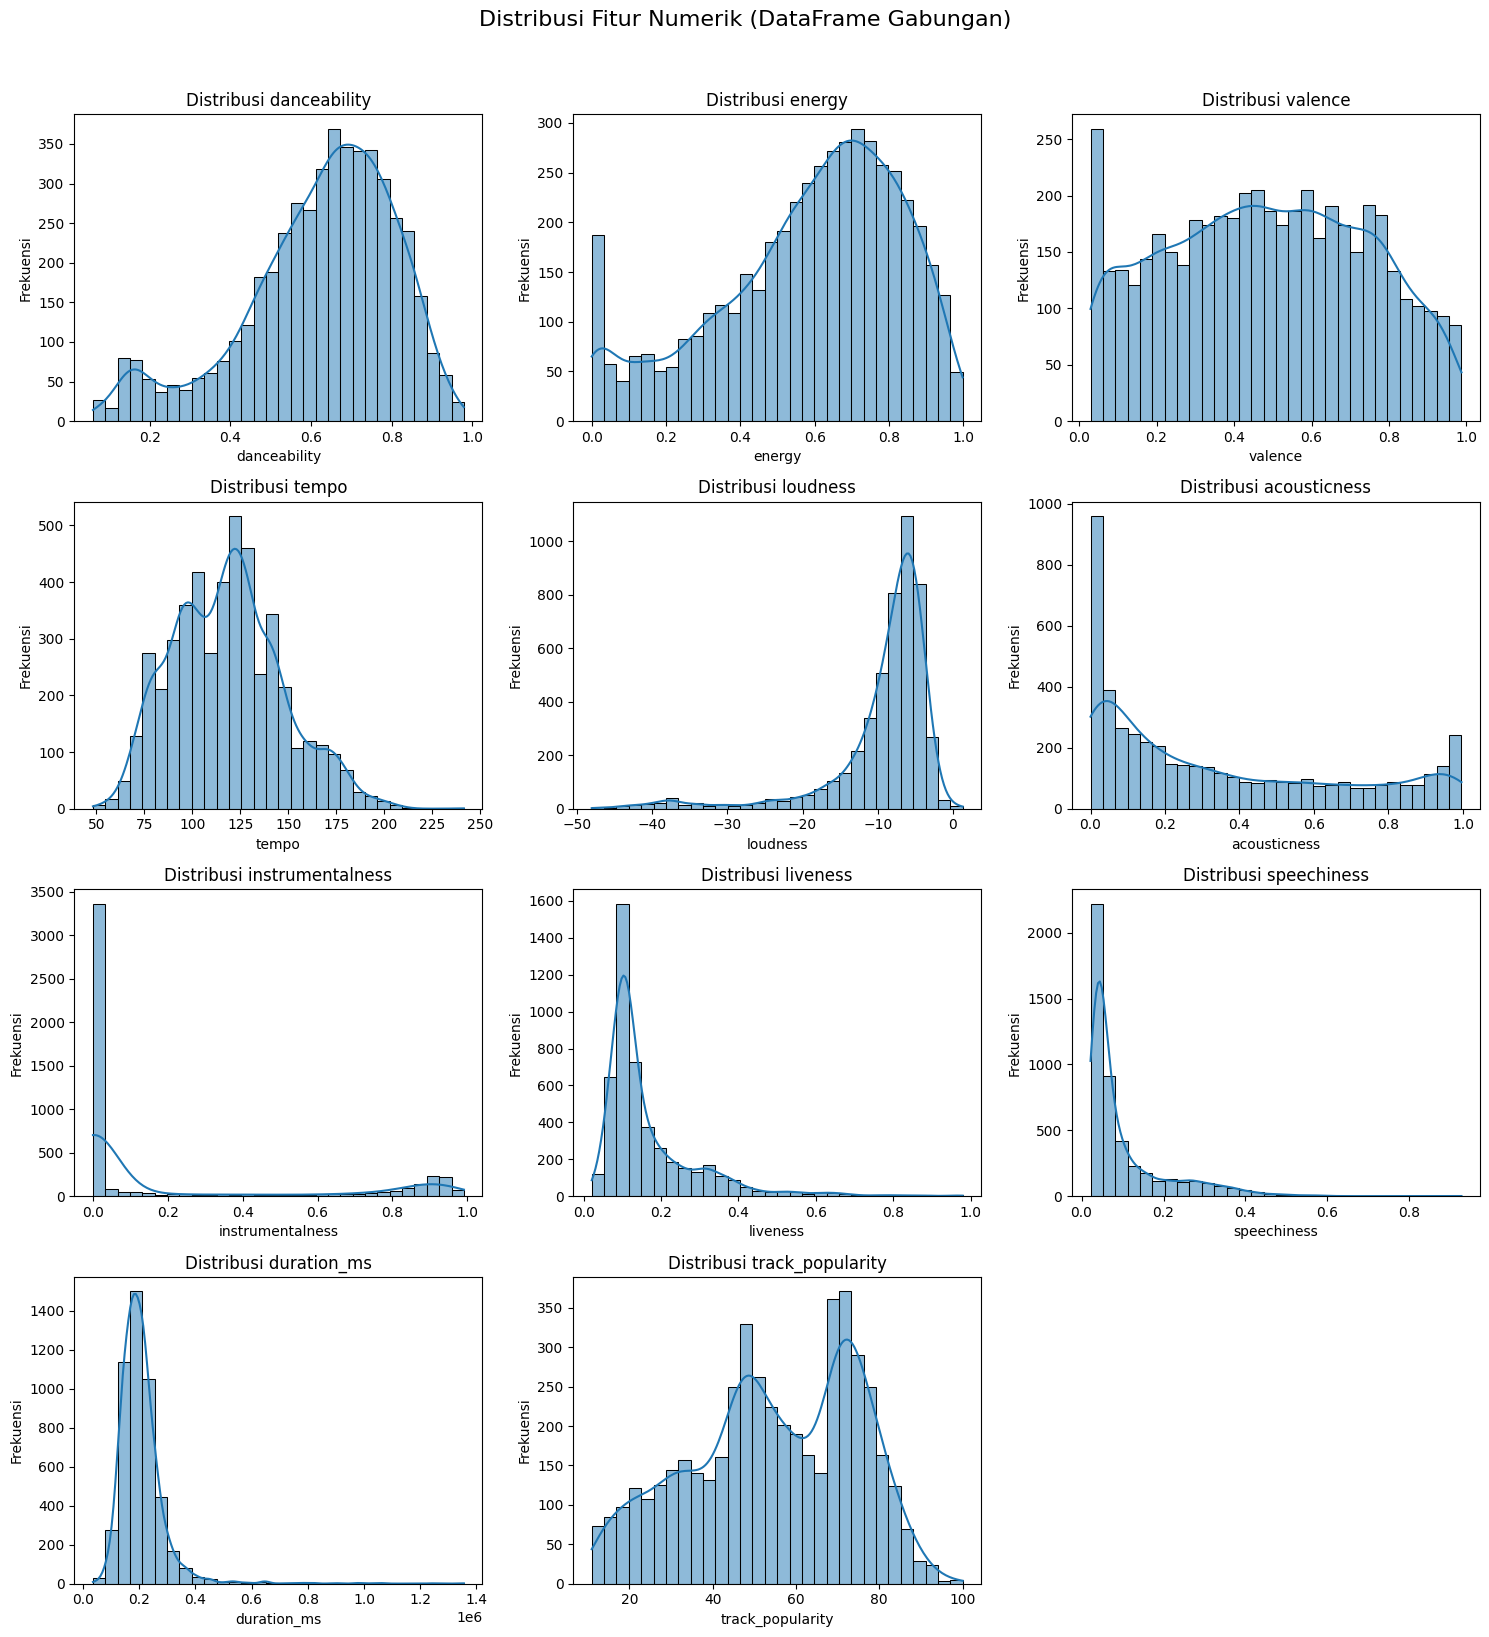

In [ ]:
# Visualisasi Distribusi Fitur Numerik (Fitur Audio dan Popularitas)
numeric_cols_for_viz = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness',
    'duration_ms', 'track_popularity'
]
numeric_cols_for_viz_exist = [col for col in numeric_cols_for_viz if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if numeric_cols_for_viz_exist:
    print("Membuat histogram untuk fitur numerik...")
    n_cols = 3
    n_rows = (len(numeric_cols_for_viz_exist) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols_for_viz_exist):
        if not df[col].dropna().empty:
             sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[i])
             axes[i].set_title(f'Distribusi {col}')
             axes[i].set_xlabel(col)
             axes[i].set_ylabel('Frekuensi')
        else:
             fig.delaxes(axes[i])

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Distribusi Fitur Numerik (DataFrame Gabungan)', y=1.02, ha='center', fontsize=16)
    plt.tight_layout()
    plt.show()


Visualisasi di atas merupakan grafik dari distribusi frekuensi pada danceability, energy, valence, tempo, loudness, acousticness, instrumentalness, liveness, speechiness, duration_ms, dan track_popularity.

<ipython-input-27-626f38816c7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


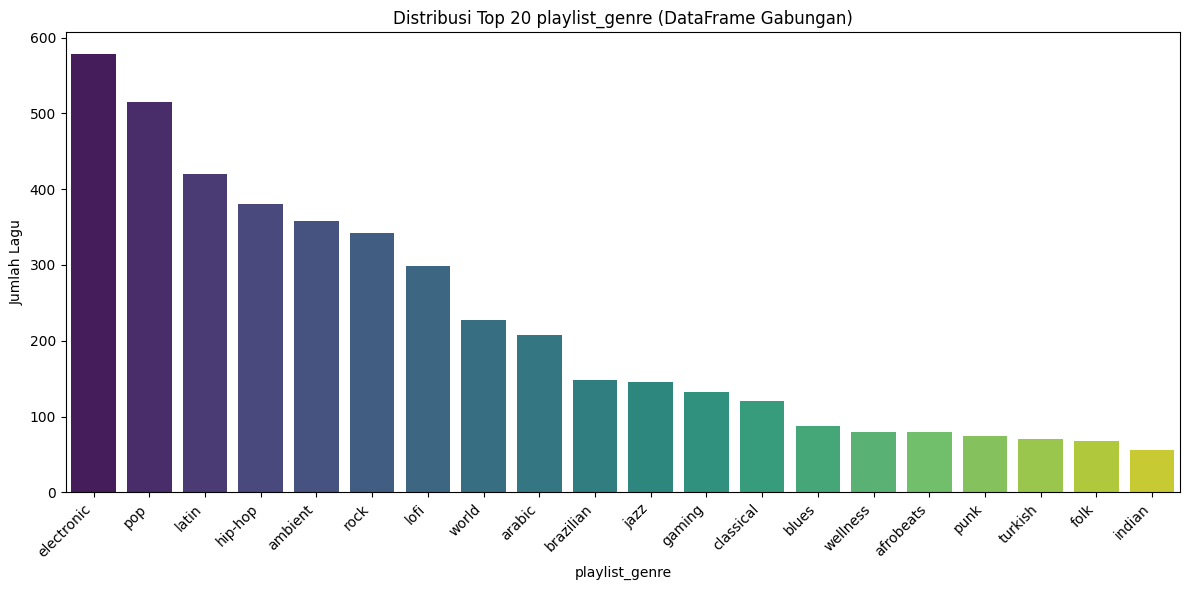

<ipython-input-27-626f38816c7f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


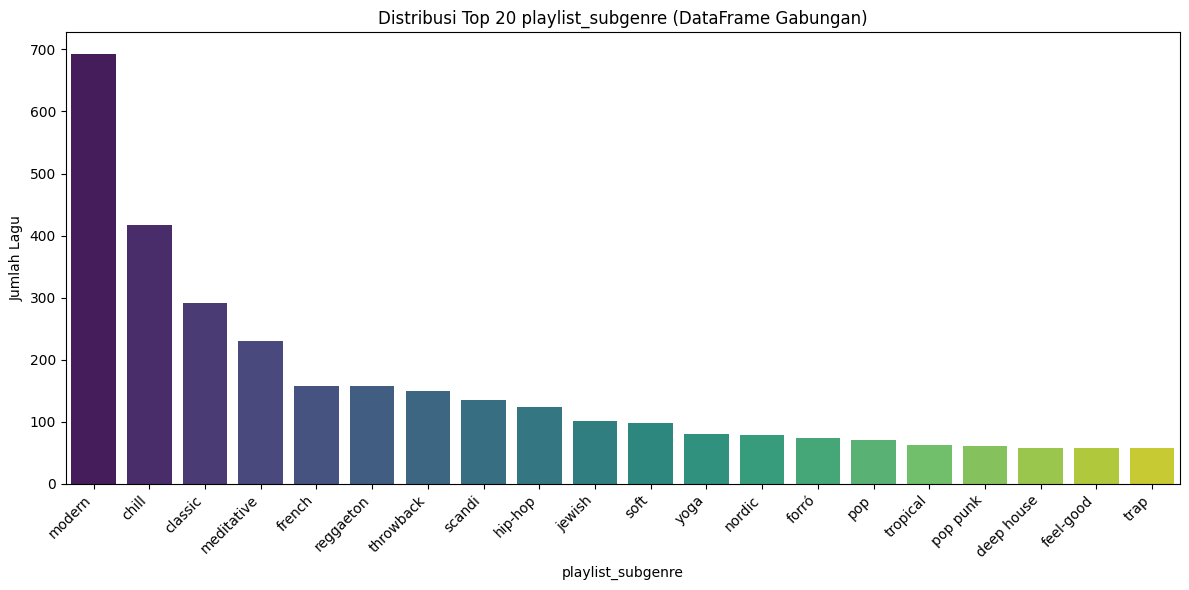

In [ ]:
# Visualisasi Distribusi Kolom Kategorikal Penting (Genre, Subgenre)
categorical_cols_for_viz = ['playlist_genre', 'playlist_subgenre']
categorical_cols_for_viz_exist = [col for col in categorical_cols_for_viz if col in df.columns]

if categorical_cols_for_viz_exist:
    for col in categorical_cols_for_viz_exist:
        plt.figure(figsize=(12, 6))
        top_categories = df[col].astype(str).value_counts().nlargest(20)
        if not top_categories.empty and top_categories.sum() > 0: # Cek jika ada data non-NaN dan hitungannya > 0
            sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
            plt.title(f'Distribusi Top {len(top_categories)} {col} (DataFrame Gabungan)')
            plt.xlabel(col)
            plt.ylabel('Jumlah Lagu')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
             print(f"Tidak ada data valid atau hitungan > 0 untuk membuat plot distribusi '{col}'.")

Visualisasi di atas adalah grafik distribusi jumlah lagu pada playlist genre dan playlist subgenre.

<ipython-input-28-4f12cdcc0989>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='plasma')


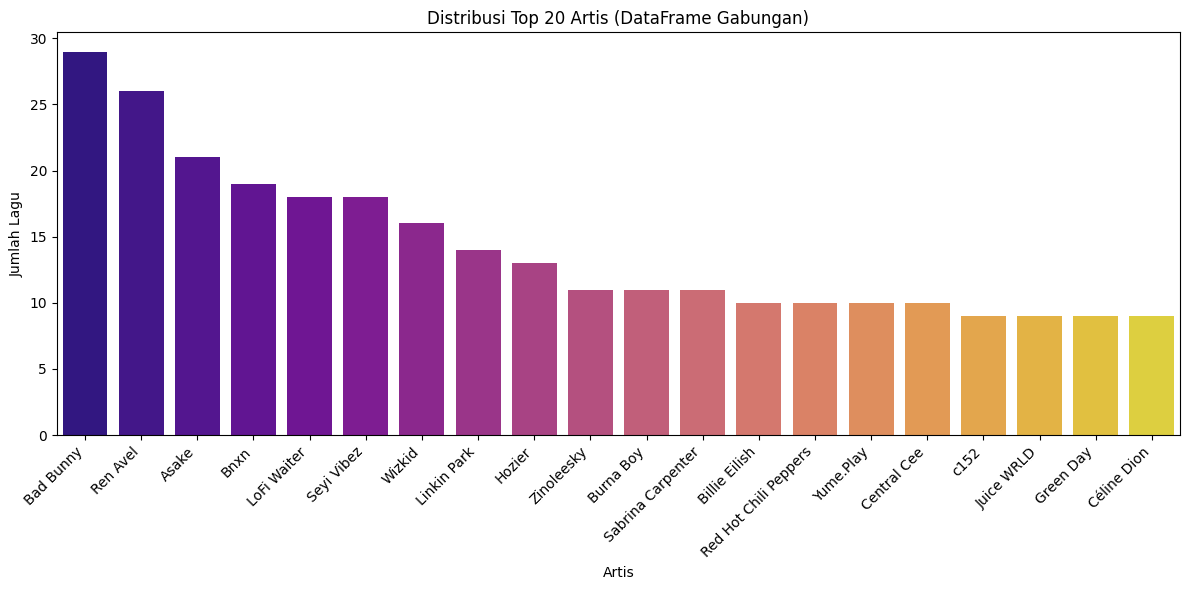

In [ ]:
# Visualisasi Distribusi Artis Teratas
if 'track_artist' in df.columns:
    plt.figure(figsize=(12, 6))
    top_artists = df['track_artist'].astype(str).value_counts().nlargest(20)
    if not top_artists.empty and top_artists.sum() > 0:
        sns.barplot(x=top_artists.index, y=top_artists.values, palette='plasma')
        plt.title('Distribusi Top 20 Artis (DataFrame Gabungan)')
        plt.xlabel('Artis')
        plt.ylabel('Jumlah Lagu')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
         print("Tidak ada data valid atau hitungan > 0 untuk membuat plot distribusi artis.")

Visualisasi di atas adalah grafik 20 artis teratas berdasarkan jumlah lagu.

In [ ]:
# Membuat Kombinasi Fitur Tekstual
print("Membuat fitur tekstual gabungan")

# Menentukan daftar kolom kategorikal/tekstual yang ingin digabungkan
text_categorical_cols = [
    'track_name', 'track_artist', 'track_album_name', 'playlist_name',
    'playlist_genre', 'playlist_subgenre'
]

# Memfilter kolom yang benar-benar ada di dalam DataFrame 'df'
text_categorical_cols_exist = [
    col for col in text_categorical_cols
    if col in df.columns
]

if text_categorical_cols_exist:
    for col in text_categorical_cols_exist:
        df[col] = df[col].astype(str).fillna('')

    # Menggabungkan kolom-kolom teks yang ada menjadi satu kolom baru 'text_features'
    df['text_features'] = df[text_categorical_cols_exist].agg(' '.join, axis=1)
    print("Fitur tekstual gabungan berhasil dibuat.")
else:
    df['text_features'] = ''
    print("Peringatan: Tidak ada kolom tekstual yang relevan ditemukan untuk fitur gabungan.")

Membuat fitur tekstual gabungan
Fitur tekstual gabungan berhasil dibuat.


Blok kode ini bertanggung jawab untuk membuat fitur tekstual gabungan dengan mengumpulkan informasi dari kolom-kolom seperti nama lagu, artis, album, serta genre dan subgenre playlist ke dalam satu kolom baru bernama 'text_features'. Proses ini dimulai dengan mengidentifikasi kolom-kolom tekstual yang benar-benar ada dalam DataFrame, memastikan datanya bertipe string dan mengisi nilai yang hilang dengan string kosong untuk mencegah error, lalu menggabungkan teks dari kolom-kolom yang sudah disiapkan tersebut untuk setiap lagu menjadi satu string panjang di kolom 'text_features', yang hasilnya sangat penting sebagai representasi konten tekstual setiap item dan siap digunakan untuk ekstraksi fitur teks lebih lanjut seperti TF-IDF dalam sistem rekomendasi berbasis konten.

In [ ]:
# Menggunakan TF-IDF Vectorizer untuk teks
print("Membuat vektor TF-IDF untuk fitur tekstual")
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
if not df['text_features'].str.strip().empty:
    tfidf_matrix = tfidf.fit_transform(df['text_features'])
    print(f"Dimensi matriks TF-IDF: {tfidf_matrix.shape}")
else:
     print("Peringatan: Fitur tekstual gabungan kosong. TF-IDF matrix tidak dibuat.")
     tfidf_matrix = np.zeros((len(df), 0))
     print(f"Dimensi matriks TF-IDF (kosong): {tfidf_matrix.shape}")

Membuat vektor TF-IDF untuk fitur tekstual
Dimensi matriks TF-IDF: (4788, 10000)


Blok kode ini bertanggung jawab untuk mengubah fitur tekstual gabungan dari kolom 'text_features' menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). Ini dilakukan dengan menginisialisasi TfidfVectorizer dari scikit-learn yang dikonfigurasi untuk mengabaikan kata-kata umum dalam bahasa Inggris (stopwords) dan membatasi jumlah fitur (kata unik) hingga max_features tertentu (dalam contoh ini 10000), kemudian memproses teks dari setiap lagu untuk menghasilkan matriks tfidf_matrix. Matriks sparse ini secara efisien merepresentasikan pentingnya setiap kata dalam konteks setiap lagu dan seluruh dataset, menjadikannya komponen penting dari vektor konten yang siap untuk perhitungan kemiripan, dengan tambahan pengecekan untuk menangani kasus jika kolom teks gabungan ternyata kosong.

In [ ]:
# Memilih dan Menskalakan Fitur Numerik (Fitur Audio & Popularitas)
numeric_cols_exist = df.select_dtypes(include=np.number).columns.tolist()
numeric_data = df[numeric_cols_exist]

Blok kode ini bertujuan untuk secara otomatis mengidentifikasi dan mengisolasi semua fitur-fitur yang memiliki tipe data numerik (yang mencakup fitur audio, popularitas, dll.) dari DataFrame utama df. Ini dilakukan dengan menggunakan metode df.select_dtypes(include=np.number) yang secara efisien memilih kolom-kolom berbasis angka, menyimpan nama-nama kolom yang ditemukan dalam daftar numeric_cols_exist, dan kemudian membuat sebuah DataFrame baru bernama numeric_data yang hanya berisi data dari kolom-kolom numerik terpilih tersebut, menjadikannya siap untuk langkah pemrosesan selanjutnya seperti penskalaan yang krusial dalam pembentukan vektor fitur konten untuk perhitungan kemiripan.

In [ ]:
# Menskalakan fitur numerik
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_data)
print("Fitur numerik berhasil diskalakan.")

Fitur numerik berhasil diskalakan.


Blok kode ini menjalankan proses skalasi standar pada fitur-fitur numerik yang telah diisolasi (numeric_data) menggunakan StandardScaler dari scikit-learn.

In [ ]:
# Menggabungkan Fitur Tekstual (TF-IDF) dan Numerik (Scaled)
print("Menggabungkan fitur tekstual dan numerik")
if tfidf_matrix.shape[0] == scaled_numeric_features.shape[0]:
     combined_features = hstack([tfidf_matrix, scaled_numeric_features])
     print(f"Dimensi matriks fitur gabungan: {combined_features.shape}")
     print("Fitur gabungan berhasil dibuat.")
else:
     print("ERROR: Jumlah baris matriks tekstual dan numerik tidak cocok! Tidak dapat menggabungkan fitur.")
     combined_features = None # Set None jika gagal digabung

Menggabungkan fitur tekstual dan numerik
Dimensi matriks fitur gabungan: (4788, 10014)
Fitur gabungan berhasil dibuat.


Kode ini secara singkat menggabungkan representasi fitur tekstual TF-IDF (tfidf_matrix) dengan fitur numerik yang sudah diskalakan (scaled_numeric_features) menggunakan scipy.sparse.hstack, menumpuknya secara horizontal untuk membentuk vektor fitur gabungan tunggal per lagu bernama combined_features, setelah terlebih dahulu memastikan bahwa kedua matriks memiliki jumlah baris (jumlah lagu) yang sama, yang mana hasil gabungan ini merupakan representasi konten akhir setiap lagu yang akan digunakan untuk menghitung kemiripan antar item.

In [ ]:
# Simpan ID lagu dan mapping index untuk memudahkan lookup nanti
print("\nPembuatan ID Internal & Mapping")
id_col = None
if 'track_id' in df.columns and df['track_id'].notna().all():
    id_col = 'track_id'
    print("Menggunakan 'track_id' sebagai basis ID lagu.")
elif 'id' in df.columns and df['id'].notna().all():
     id_col = 'id'
     print("Menggunakan 'id' sebagai basis ID lagu (karena 'track_id' tidak tersedia/lengkap).")
else:
    df['generated_id'] = df.index.astype(str)
    id_col = 'generated_id'
    print("Peringatan: Tidak ada kolom ID unik yang jelas. Menggunakan index DataFrame sebagai basis ID lagu ('generated_id').")


Pembuatan ID Internal & Mapping
Menggunakan 'track_id' sebagai basis ID lagu.


Kode ini berfungsi untuk secara otomatis memilih atau membuat kolom identifikasi unik (ID) untuk setiap lagu dalam DataFrame, yang krusial untuk menghubungkan hasil perhitungan kemiripan (berdasarkan index numerik) kembali ke informasi lagu yang relevan. Proses ini secara berurutan memeriksa apakah kolom 'track_id' atau 'id' tersedia dan lengkap untuk dijadikan basis ID; jika tidak ada yang cocok, akan membuat kolom ID baru 'generated_id' berdasarkan index DataFrame; pada akhirnya, nama kolom ID yang dipilih atau dibuat disimpan dalam variabel id_col, memastikan setiap lagu memiliki pengenal yang handal untuk keperluan mapping dan lookup rekomendasi.

In [ ]:
# Membuat ID internal unik dan hashable
df['song_id_internal'] = df.index.astype(str) + "_" + df[id_col].astype(str)
song_ids = df['song_id_internal'].tolist()

Kode ini secara membuat ID internal unik per lagu dengan menggabungkan index DataFrame dan ID basis yang dipilih (id_col) menjadi kolom baru 'song_id_internal', lalu mengubah kolom ini menjadi daftar song_ids, memastikan setiap lagu memiliki pengenal tunggal yang pasti unik dan siap digunakan untuk pembuatan mapping index ke fitur gabungan.

In [ ]:
# Membuat mapping dari ID lagu ke index dalam matriks fitur
id_to_index = {song_id: index for index, song_id in enumerate(song_ids)}
index_to_id = {index: song_id for index, song_id in enumerate(song_ids)}
print("Pembuatan ID internal dan mapping selesai.")

Pembuatan ID internal dan mapping selesai.


Kode ini menyelesaikan tahap persiapan data dengan membuat mapping antara ID internal unik setiap lagu (song_ids) dan index numerik (posisi) mereka dalam matriks fitur gabungan serta matriks kemiripan. Dua kamus, id_to_index yang memetakan ID ke index dan index_to_id yang memetakan index kembali ke ID lagu, dibuat menggunakan list song_ids. Mappings ini sangat penting karena matriks-matriks tersebut diakses menggunakan index numerik, sehingga mapping ini menjembatani ID lagu yang mudah dikenali dengan lokasi data yang sebenarnya, memungkinkan sistem rekomendasi untuk mencari dan mengidentifikasi lagu dengan efisien.

## Modelling

In [ ]:
similarity_matrix = None # Inisialisasi

if combined_features is not None and combined_features.shape[1] > 0:
    print("Menghitung Cosine Similarity antar lagu")
    try:
        similarity_matrix = cosine_similarity(combined_features)
        print(f"Dimensi matriks kemiripan: {similarity_matrix.shape}")
        print("Matriks kemiripan berhasil dihitung.")
    except Exception as e:
        print(f"ERROR saat menghitung matriks kemiripan: {e}")
        print("Tidak dapat melanjutkan ke tahap rekomendasi.")
else:
    print("Tidak dapat menghitung matriks kemiripan karena fitur gabungan tidak dibuat atau kosong.")

Menghitung Cosine Similarity antar lagu
Dimensi matriks kemiripan: (4788, 4788)
Matriks kemiripan berhasil dihitung.


Model ini menggunakan pendekatan Content-Based. Inti dari pemodelan Content-based, blok kode ini menghitung matriks kemiripan antar lagu menggunakan cosine_similarity dari scikit-learn pada fitur gabungan (combined_features) yang telah disiapkan, menghasilkan similarity_matrix yang akan dipakai untuk mencari rekomendasi, setelah terlebih dahulu memeriksa apakah fitur gabungan tersebut valid.

In [ ]:
# Fungsi Rekomendasi
def get_content_based_recommendations(song_id, similarity_matrix, id_to_index, index_to_id, df, num_recommendations=10):
    """
    Memberikan rekomendasi lagu berdasarkan kemiripan konten.

    Args:
        song_id (str/int): ID dari lagu yang menjadi dasar rekomendasi (dari kolom 'song_id_internal').
        similarity_matrix (np.array or sparse matrix): Matriks kemiripan antar item.
        id_to_index (dict): Mapping dari ID lagu ke index baris/kolom di matriks kemiripan.
        index_to_id (dict): Mapping dari index baris/kolom di matriks kemiripan ke ID lagu.
        df (pd.DataFrame): DataFrame asli berisi informasi lagu (termasuk 'song_id_internal').
        num_recommendations (int): Jumlah rekomendasi yang diinginkan.

    Returns:
        pd.DataFrame: DataFrame berisi rekomendasi lagu (kecuali lagu input itu sendiri).
                      Mengandung kolom 'song_id_internal', 'track_name', 'track_artist',
                      'playlist_genre', 'playlist_subgenre', 'Similarity_Score'.
                      Mengembalikan DataFrame kosong jika ID lagu tidak ditemukan atau similarity matrix kosong.
    """
    if similarity_matrix is None:
        print("Error: Similarity matrix belum dibuat.")
        return pd.DataFrame(columns=['song_id_internal', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'Similarity_Score'])

    if song_id not in id_to_index:
        print(f"Error: ID lagu '{song_id}' tidak ditemukan dalam mapping ID ke index.")
        return pd.DataFrame(columns=['song_id_internal', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'Similarity_Score'])

    idx = id_to_index[song_id]
    similarity_scores = similarity_matrix[idx].flatten()

    song_scores = list(enumerate(similarity_scores))
    song_scores = sorted(song_scores, key=lambda x: x[1], reverse=True)[1 : num_recommendations + 1]

    recommended_indices = [i[0] for i in song_scores]
    recommendation_scores = [i[1] for i in song_scores]

    recommended_song_ids = [index_to_id[i] for i in recommended_indices]

    # Mengambil informasi lagu yang direkomendasikan dari DataFrame asli
    if 'song_id_internal' in df.columns:
        recommended_songs_info = df[df['song_id_internal'].isin(recommended_song_ids)].copy()
    else:
         print("Peringatan: Kolom 'song_id_internal' tidak ditemukan di DataFrame asli saat mengambil info rekomendasi.")
         return pd.DataFrame(columns=['song_id_internal', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'Similarity_Score'])

    scores_df = pd.DataFrame({'song_id_internal': recommended_song_ids, 'Similarity_Score': recommendation_scores})

    recommended_songs_info = pd.merge(
        recommended_songs_info,
        scores_df,
        on='song_id_internal',
        how='left'
    ).sort_values(by='Similarity_Score', ascending=False)

    output_cols = ['song_id_internal', 'track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'Similarity_Score']
    output_cols_exist = [col for col in output_cols if col in recommended_songs_info.columns]

    return recommended_songs_info[output_cols_exist]

Fungsi get_content_based_recommendations bertindak sebagai mesin rekomendasi utama: fungsi ini menerima ID lagu input, menggunakan matriks kemiripan (similarity_matrix) dan mapping yang relevan untuk menemukan lagu-lagu yang paling mirip berdasarkan konten, dan mengembalikan daftar Top-N lagu rekomendasi beserta skor kemiripannya dalam bentuk DataFrame yang siap disajikan.

## Evaluation

In [ ]:
if similarity_matrix is not None and not df.empty:
    print("Melakukan demonstrasi sistem rekomendasi")

    example_indices_raw = [0, len(df) // 4, len(df) // 2, len(df) * 3 // 4, len(df) - 1]
    example_song_indices = [idx for idx in example_indices_raw if 0 <= idx < len(df)]
    example_song_indices = list(set(example_song_indices))
    example_song_indices.sort()

    print(f"Memilih {len(example_song_indices)} lagu contoh untuk demonstrasi:")

    info_cols_exist = ['track_name', 'track_artist', 'playlist_genre', 'playlist_subgenre']
    info_cols_exist = [col for col in info_cols_exist if col in df.columns]
    audio_feature_display_cols = ['danceability', 'energy', 'tempo', 'loudness']
    audio_feature_display_cols_exist = [col for col in audio_feature_display_cols if col in df.columns]


    for idx in example_song_indices:
        example_song_id = df.iloc[idx]['song_id_internal']
        original_song_info = df.iloc[idx]

        print(f"\n--- Rekomendasi untuk Lagu Input (Index: {idx}) ---")
        print(f"ID Internal: {example_song_id}")

        for col in info_cols_exist:
            print(f"{col.replace('_', ' ').title()}: '{original_song_info.get(col, 'N/A')}'")

        if audio_feature_display_cols_exist:
             audio_info_str = ", ".join([f"{col.replace('_', ' ').title()}={original_song_info.get(col, np.nan):.2f}" for col in audio_feature_display_cols_exist])
             print(f"Fitur Audio (contoh): {audio_info_str}")

        recommendations = get_content_based_recommendations(example_song_id, similarity_matrix, id_to_index, index_to_id, df, num_recommendations=5)

        print("\nRekomendasi (Top 5):")
        if not recommendations.empty:
            print(recommendations.to_string())

        else:
            print("Tidak ada rekomendasi ditemukan untuk lagu ini.")

else:
    print("Tidak dapat melakukan evaluasi karena matriks kemiripan tidak berhasil dibuat atau dataset kosong.")

Melakukan demonstrasi sistem rekomendasi
Memilih 5 lagu contoh untuk demonstrasi:

--- Rekomendasi untuk Lagu Input (Index: 0) ---
ID Internal: 0_2plbrEY59IikOBgBGLjaoe
Track Name: 'Die With A Smile'
Track Artist: 'Lady Gaga, Bruno Mars'
Playlist Genre: 'pop'
Playlist Subgenre: 'mainstream'
Fitur Audio (contoh): Danceability=0.52, Energy=0.59, Tempo=157.97, Loudness=-7.78

Rekomendasi (Top 5):
              song_id_internal        track_name           track_artist playlist_genre playlist_subgenre  Similarity_Score
0   455_2plbrEY59IikOBgBGLjaoe  Die With A Smile  Lady Gaga, Bruno Mars         gaming            modern          0.991571
1   676_2plbrEY59IikOBgBGLjaoe  Die With A Smile  Lady Gaga, Bruno Mars            pop            global          0.990805
3   810_6Qyc6fS4DsZjB2mRW9DsQs              Iris      The Goo Goo Dolls            pop              soft          0.818637
2   715_6Qyc6fS4DsZjB2mRW9DsQs              Iris      The Goo Goo Dolls            pop            global       

Evaluasi sistem rekomendasi ini dirancang untuk mengukur seberapa efektif model Content-based Filtering dalam merekomendasikan lagu-lagu yang relevan. Mengingat ketiadaan data interaksi pengguna eksplisit, proyek ini menggunakan evaluasi kualitatif berbasis konten. ami memilih beberapa lagu contoh dari dataset, yang merepresentasikan berbagai genre dan karakteristik audio. Untuk setiap lagu contoh, sistem rekomendasi dijalankan untuk menghasilkan daftar Top-N lagu yang paling mirip. Hasil rekomendasi ini kemudian dianalisis secara deskriptif. Analisis ini melibatkan pemeriksaan kesamaan pada metadata tekstual (seperti genre, subgenre, artis, dan nama lagu) serta fitur audio (seperti danceability, energy, tempo, dan loudness) antara lagu input dan lagu-lagu yang direkomendasikan. Selain itu, nilai Similarity Score (Cosine Similarity) yang tinggi pada rekomendasi menjadi indikator kuat kemiripan konten yang diukur oleh model. Metrik ini bertujuan untuk memahami mengapa rekomendasi tersebut relevan dari perspektif konten, dan secara langsung selaras dengan tujuan proyek untuk "Menghasilkan Rekomendasi yang Relevan" dan "Melakukan Evaluasi Kualitatif".

Hasil evaluasi kualitatif berbasis konten sebagai contoh, ketika lagu input 'Tranquillo' oleh Escix V (Genre: 'wellness', Subgenre: 'yoga', dengan fitur audio seperti Danceability 0.15, Energy 0.01, Loudness -37.56) diberikan kepada sistem, rekomendasi Top 5 yang dihasilkan menunjukkan relevansi yang kuat seperti pada output sel di atas. Analisis menunjukkan bahwa rekomendasi didominasi oleh lagu-lagu dari genre 'wellness' dan 'ambient' dengan subgenre terkait seperti 'yoga' dan 'chill'. Ini secara langsung mencerminkan genre dan subgenre dari lagu input, membuktikan kemampuan sistem dalam menangkap kemiripan berdasarkan metadata tekstual/kategorikal. Selain itu, skor kemiripan (Similarity Score) yang sangat tinggi (0.925 hingga 0.979) mengindikasikan bahwa model menganggap lagu-lagu ini sangat dekat dengan lagu input di ruang fitur gabungan, termasuk fitur audio yang diskalakan. Hal ini menunjukkan sistem berhasil menemukan lagu-lagu dengan karakteristik "rasa" atau suara yang mirip.